In [ ]:
# TASK

# <a id='7'>Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable. Here is the code to load the data: <a/>

In [71]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston 
import seaborn as sns
boston = load_boston()
# bos = pd.DataFrame(boston.data)

In [35]:
from sklearn.datasets import load_boston
boston = load_boston()

In [39]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [40]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# Now let's create a DataFrame from the above

In [19]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Observation: The columns seem to be missing so we need to create columns for the above DataFrame

In [6]:
bos.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
bos.keys()

RangeIndex(start=0, stop=13, step=1)

In [ ]:
# Creating the columns for the Dataframe

In [16]:
bos.columns

RangeIndex(start=0, stop=13, step=1)

In [20]:
bos.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12']

In [27]:
col_dict = bos.columns.to_list()

In [28]:
col_dict

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [12]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']

In [29]:
col_dict = features

In [30]:
col_dict

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
# Adding the columns to the DataFrame

In [31]:
bos.columns = col_dict

In [32]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# Now lets add the Price columns which is the target variable

In [44]:
bos['PRICE'] = boston.target

In [46]:
# Check results
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
print('Boston Data - rows:' , bos.shape[0],'columns:', bos.shape[1])

Boston Data - rows: 506 columns: 14


In [48]:
# Check Statistical Analysis of DataFrame
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [49]:
# check for info on datatypes of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     0 non-null      float64
 1   ZN       0 non-null      float64
 2   INDUS    0 non-null      float64
 3   CHAS     0 non-null      float64
 4   NOX      0 non-null      float64
 5   RM       0 non-null      float64
 6   AGE      0 non-null      float64
 7   DIS      0 non-null      float64
 8   RAD      0 non-null      float64
 9   TAX      0 non-null      float64
 10  PTRATIO  0 non-null      float64
 11  B        0 non-null      float64
 12  LSTAT    0 non-null      float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# Observation: There are no null values in the DF

In [52]:
# Check if there are any duplicates in the DF.
bos.duplicated().sum()

0

In [55]:
# Check number of missing values in the dataframe eventhough i know there are non from the info table
bos.isna().any().any()

False

In [57]:
# Note DF is clean of Nan values
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# EDA to understand a bit more about our DataFrame

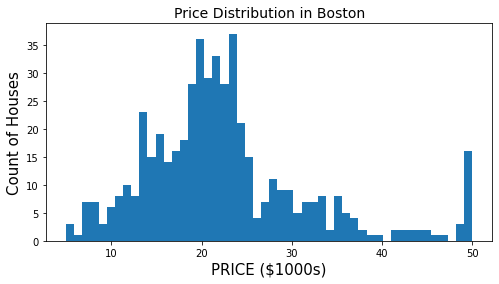

In [69]:
# Housing price (target) histogram 
plt.figure(figsize=(8, 4))
plt.hist(bos['PRICE'], bins=50)
plt.xlabel('PRICE ($1000s)' , fontsize= 15)
plt.ylabel('Count of Houses' , fontsize = 15)
plt.title('Price Distribution in Boston' , fontsize = 14)
plt.show()

# Observations on Price distribution:
So, in we look at the histogram, most of the prices are in 20's. We notice that, the average price is around ~ 22K. There are some houses in 50's as well.
If you want, you can drop these rows where the price is in 50's, at the moment, we are keeping all the data

# Using Pairplots to have a broader look at the correlation between variables

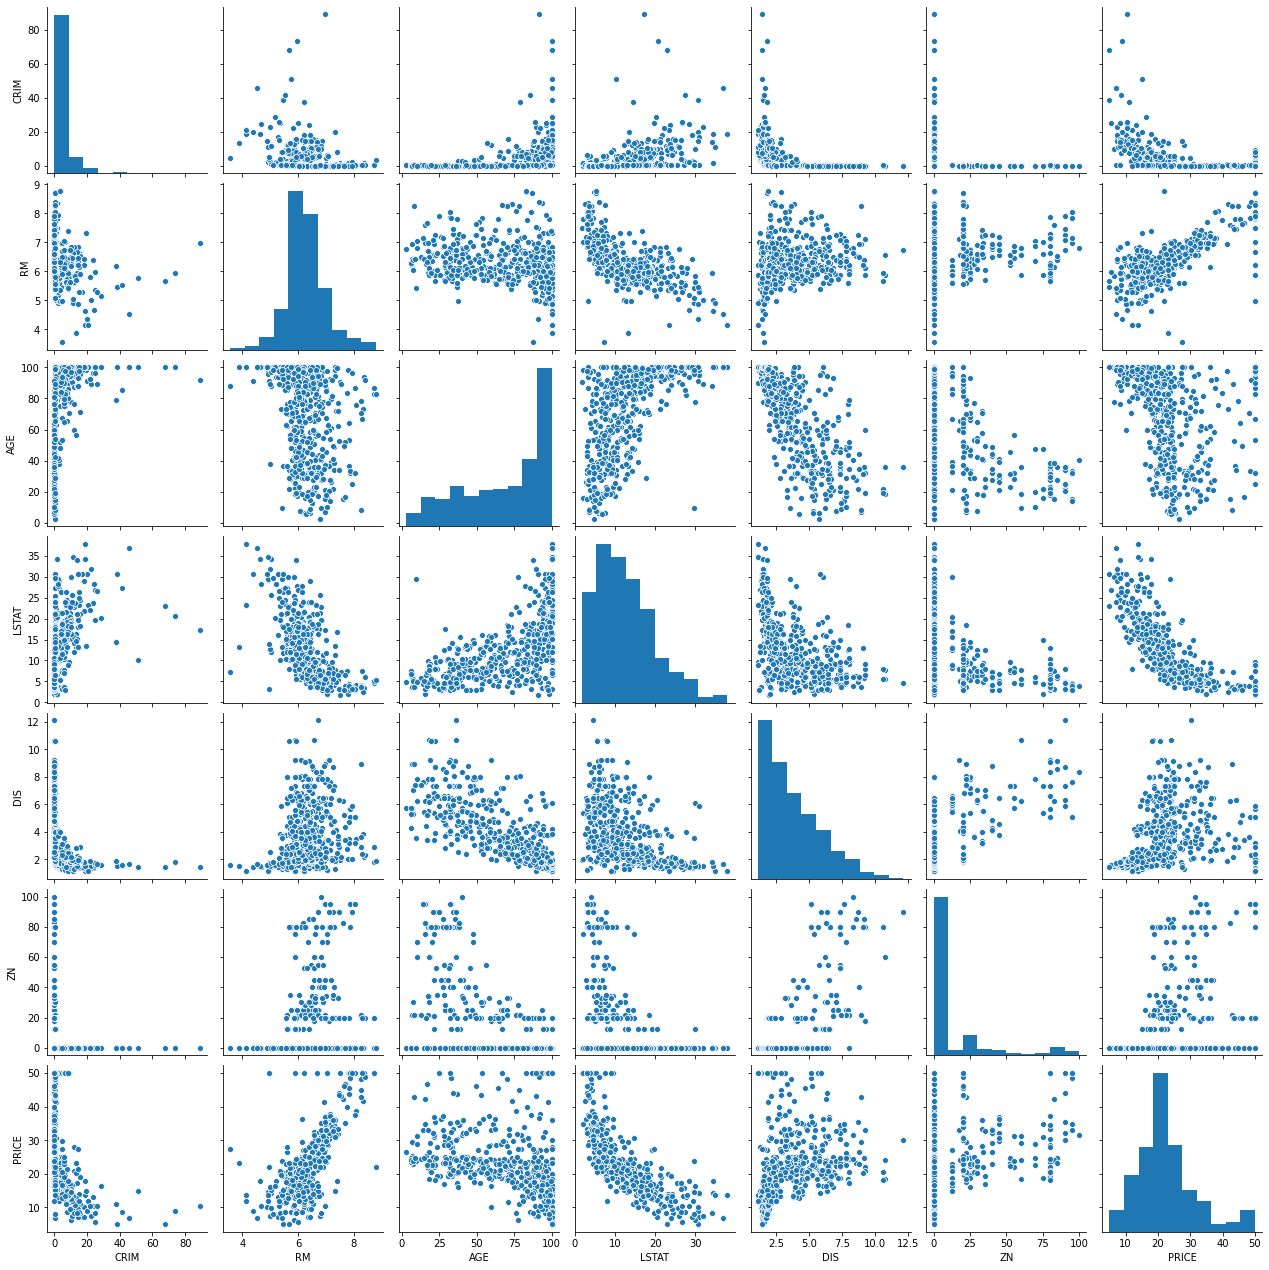

In [73]:
# Here i am subsetting only the part of the DF i am interested in ie Crime, No of rooms, Age of the house, Price
sns.pairplot(bos[['CRIM','RM','AGE','LSTAT','DIS','ZN','PRICE']]) 

#sns.pairplot(bos) # in case you want to plot whole dataset!

In [ ]:
# Observation : If we take a look at the last row we can see the variables we selected and their distribution

# Let's see how the correlation between selected features looks like using heatmap

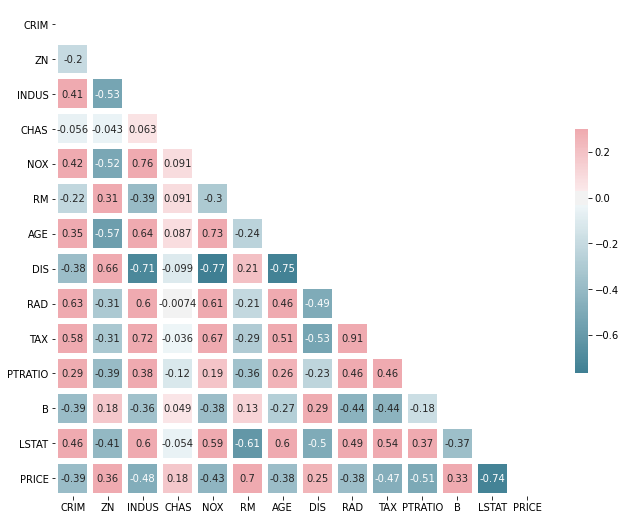

In [83]:
# corr = bos[['CRIM','RM','AGE','LSTAT','DIS','ZN','PRICE']].corr()
corr = bos.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
"""Generate a mask for the upper triangle"""
mask = np.zeros_like(corr , dtype=np.bool)
mask[np.triu_indices_from(mask)]=True 
"""Set up the matplotlib figure"""
f , ax = plt.subplots(figsize=(11,9))
"""Draw the heatmap with the mask and correct aspect ratio"""
sns.heatmap(corr , mask = mask , cmap=cmap , vmax=.3, center=0 , annot=True,
           square = True , linewidths=5 , cbar_kws={'shrink':.5});

# Now Les Subset the Heatmap into the Variables we are interested in.

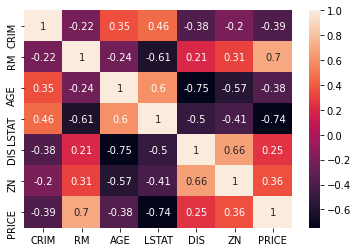

In [76]:
sns.heatmap(bos[['CRIM','RM','AGE','LSTAT','DIS','ZN','PRICE']].corr() , annot = True , CMAP = 'viridis')

# Observation : 
So, every column is perfectly correlated to itself along the diagonal! we can see +ve and -ve correlation between price and other features. No of rooms have the highest value for price, that make sense, more the rooms are, higher the price is where as older the house is, lower the price you can expect!

# Splitting the Data

In [130]:
X = bos[['CRIM','RM','AGE','LSTAT','DIS','ZN']] # features
y = bos['PRICE'] # target

In [131]:
X.head()

,CRIM,RM,AGE,LSTAT,DIS,ZN
0,0.00632,6.575,65.2,4.98,4.0900,18.0
1,0.02731,6.421,78.9,9.14,4.9671,0.0
2,0.02729,7.185,61.1,4.03,4.9671,0.0
3,0.03237,6.998,45.8,2.94,6.0622,0.0
4,0.06905,7.147,54.2,5.33,6.0622,0.0


In [132]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

# Train Test Split

In [87]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, x_test , y_train , y_test = train_test_split(X,y,test_size=0.33 , random_state = 42)

In [ ]:
# Print the shape of the training and test datasets

In [134]:
print(X_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 6)
(167, 6)
(339,)
(167,)


# Importing Linear Regression model - the estimatoor

In [135]:
from sklearn.linear_model import LinearRegression
LineReg = LinearRegression()

In [136]:
LineReg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Check the intercept

In [137]:
LineReg.intercept_

8.905286971988026

In [138]:
# Check the coefficients
LineReg.coef_

array([-0.17564927,  4.53727272, -0.02529785, -0.66556685, -1.24284723,
        0.05834141])

# Lets Create a DataFrame for the coefficients

In [139]:
X.columns
coeff = pd.DataFrame(data = LineReg.coef_ , index = X.columns , columns = ['Coefficients'])

In [140]:
coeff

,Coefficients
CRIM,-0.175649
RM,4.537273
AGE,-0.025298
LSTAT,-0.665567
DIS,-1.242847
ZN,0.058341


# Explaining our coefficients
- An increase or decrease in the coefficients has an effect on the target price

# Prediction

In [141]:
pred = LineReg.predict(x_test)

# Plotting Predictions

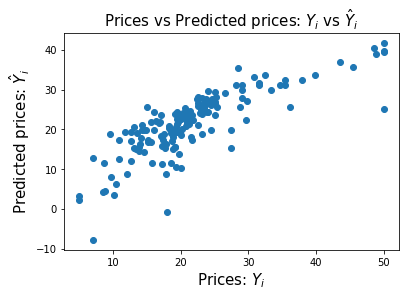

In [142]:
plt.scatter(y_test, pred)
plt.xlabel("Prices: $Y_i$" , fontsize = 15)
plt.ylabel("Predicted prices: $\hat{Y}_i$" , fontsize = 15)
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$" , fontsize = 15)
plt.show()

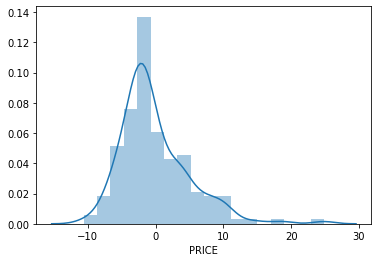

In [143]:
sns.distplot(y_test - pred)

# The Mean Squared Error (MSE) or Residual Sum of Squares

In [145]:
mse = sklearn.metrics.mean_squared_error(y_test, pred)
print(mse)
# print "The Mean Squared Error (MSE) %.2f" %np.mean((LineReg.predict(x_test)-y_test)**2)

26.598371716003342


# Calculate the variance # The closer the number is to one (1) , the better the accuracy of the model

In [146]:
print('variance score is %2.f'%LineReg.score(x_test , y_test ))

variance score is  1


# &#9758; Now to be sure of our predictions we need to check for r2

 - Now lets check the r2 rules
 
    r2 < 0.19 - Very weak correlation
    
    0.20 - 0.39 - weak correlation
    
    0.4 - 0.59 - Moderate
    
    0.6 - 0.79 - Strong correlation

In [147]:
print(r2_score(y_test , pred))

0.6485346726828873


# Observation:

## &#9758; There is a strong correlation between the variables thus r2 is 0.6485

# Explanation of the Evaluation Metrics . What do they mean? And why should we care?

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems. All of these are **loss functions**, because we want to minimize them.<br>


**[Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)** (MAE) is the mean of the absolute value of the errors: <br>
it's the average error!

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i  |$$

**[Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)** (MSE) is the mean of the squared errors:<br>
**MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**[Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)** (RMSE) is the square root of the mean of the squared errors:<br>
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units. <br><br>The root-mean-squared error (**RMSE**) **or** root-mean-square deviation (**RMSD**), is a frequently used measure of the differences between values predicted by a model or an estimator and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
<br><br><br>
Let's calculate MAE, MSE and RMSE for our model. <br>We need to pass the y_test and predictions to the respective method!<br>


In [149]:
from sklearn import metrics

In [150]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.8723125587512737
MSE: 26.598371716003342
RMSE: 5.157360925512519


# Done